In [9]:
import requests
import nltk
import plotly

In [17]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [18]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
def get_push_shift_data(data_type, **kwargs):
    """Returns results from a pushshift.io query
    """
    # Note: using f"" strings automatically calls format() with named arguments
    # taken from the current namespace
    query_url = f"https://api.pushshift.io/reddit/search/{data_type}/"
    search_args = kwargs
    request = requests.get(query_url, params=search_args)
    return request.json()


In [22]:
# parameters for pushshift.io
# Full list: https://pushshift.io/api-parameters/
data_type = "comment"   # can be "comment" or "submission"
query = "liberal assholes"      # search string
duration = "30d"        # sets a time frame
size = "1000"           # Sets a maximum amount of comments to return
sort_type = "score"     # Options: "score", "num_comments", "created_utc"
sort = "desc"
subreddit = "nba"
aggs = "subreddit"       # groupings, options: "author", "link_id", "created_utc", "subreddit"

In [26]:
aggdata = get_push_shift_data(data_type=data_type,
                            q = query,
                            after = duration,
                            size = size,
                            subreddit = "nba",
                            aggs = aggs)

In [27]:
data = aggdata.get("aggs").get(aggs)
data

[{'doc_count': 2, 'key': 'nba'}]

[{'doc_count': 48, 'key': 'politics'},
 {'doc_count': 22, 'key': 'AskReddit'},
 {'doc_count': 20, 'key': 'Conservative'},
 {'doc_count': 18, 'key': 'news'},
 {'doc_count': 13, 'key': 'ActualPublicFreakouts'},
 {'doc_count': 12, 'key': 'Coronavirus'},
 {'doc_count': 12, 'key': 'PublicFreakout'},
 {'doc_count': 10, 'key': 'pics'},
 {'doc_count': 9, 'key': 'PoliticalCompassMemes'},
 {'doc_count': 8, 'key': 'AskALiberal'},
 {'doc_count': 7, 'key': 'PoliticalHumor'},
 {'doc_count': 7, 'key': 'liberalgunowners'},
 {'doc_count': 6, 'key': 'AmItheAsshole'},
 {'doc_count': 6, 'key': 'SubredditDrama'},
 {'doc_count': 5, 'key': '2ALiberals'},
 {'doc_count': 5, 'key': 'AdviceAnimals'},
 {'doc_count': 5, 'key': 'OutOfTheLoop'},
 {'doc_count': 5, 'key': 'unpopularopinion'},
 {'doc_count': 4, 'key': 'CapitalismVSocialism'},
 {'doc_count': 4, 'key': 'Gamingcirclejerk'},
 {'doc_count': 4, 'key': 'chicago'},
 {'doc_count': 4, 'key': 'conspiracy'},
 {'doc_count': 4, 'key': 'rant'},
 {'doc_count': 4, 'key

In [13]:
comments = get_push_shift_data(data_type=data_type,
                           q = query,
                           after = duration,
                           sort_type = "score",
                           sort = "desc",
                           size = size)

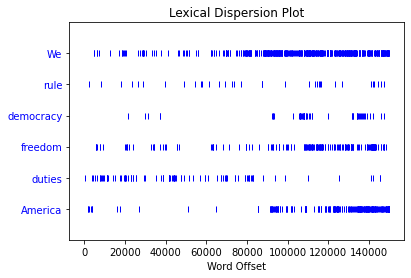

In [21]:
text4.dispersion_plot(["We", "rule", "democracy", "freedom", "duties", "America"])